In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

#upload the dataset
df = pd.read_csv('CHL5230-F23-Datathon#1-Dataset2.csv')

df['Cancer Status'] = df['Severity'] != 3
df.head()

X = df[['Age','Gender','Air Pollution','Alcohol Usage','Genetic Risk',
        'Lung Disease','Obesity','Smoking',	'Passive Smoker', 'Chest Pain', 'Coughing of Blood']]
y = df['Severity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Age                  0
Gender               0
Air Pollution        0
Alcohol Usage        0
Genetic Risk         0
Lung Disease         0
Obesity              0
Smoking              0
Passive Smoker       0
Chest Pain           0
Coughing of Blood    0
Severity             0
Cancer Status        0
dtype: int64


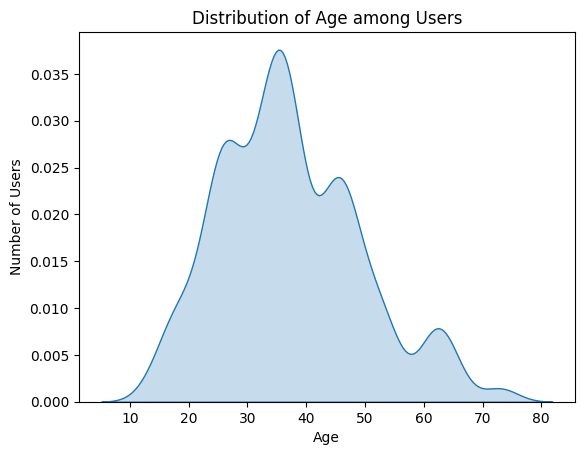

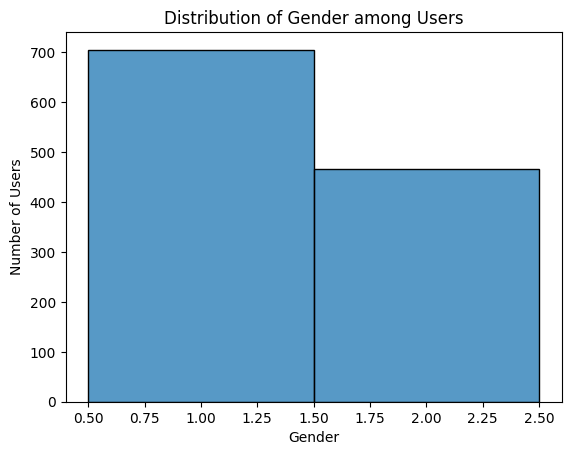

In [41]:
# Check for missing values in the dataset
print(df.isna().sum())

# Distribution/Histogram Plots
import plotly.express as px
import plotly.io as pio

# Create a density plot for a single variable
sns.kdeplot(X_train["Age"], fill=True)

plt.title('Distribution of Age among Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

sns.histplot(X_train["Gender"], discrete=True, fill=True)
plt.title('Distribution of Gender among Users')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()


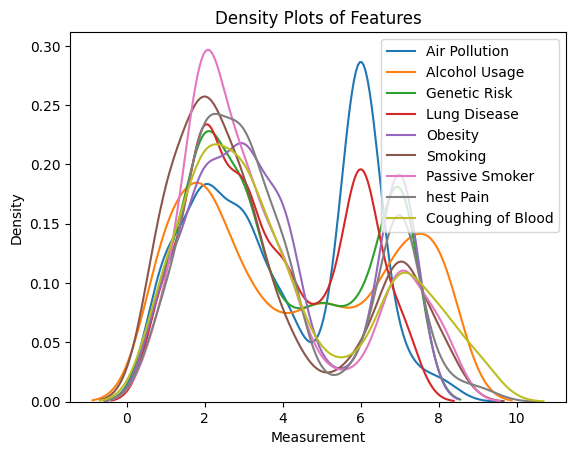

In [42]:
# Plot distributions of the features

fig, ax = plt.subplots()

# sns.kdeplot(X_train['Gender'], label="Gender", ax=ax)
sns.kdeplot(X_train['Air Pollution'], label="Air Pollution", ax=ax)
sns.kdeplot(X_train["Alcohol Usage"], label="Alcohol Usage", ax=ax)
sns.kdeplot(X_train["Genetic Risk"], label="Genetic Risk", ax=ax)
sns.kdeplot(X_train["Lung Disease"], label="Lung Disease", ax=ax)
sns.kdeplot(X_train["Obesity"], label="Obesity", ax=ax)
sns.kdeplot(X_train["Smoking"], label="Smoking", ax=ax)
sns.kdeplot(X_train["Passive Smoker"], label="Passive Smoker", ax=ax)
sns.kdeplot(X_train['Chest Pain'], label="hest Pain", ax=ax)
sns.kdeplot(df["Coughing of Blood"], label="Coughing of Blood", ax=ax)

# Add labels and a legend
ax.set_xlabel("Measurement")
ax.set_ylabel("Density")
ax.set_title("Density Plots of Features")
ax.legend()

# Show the plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

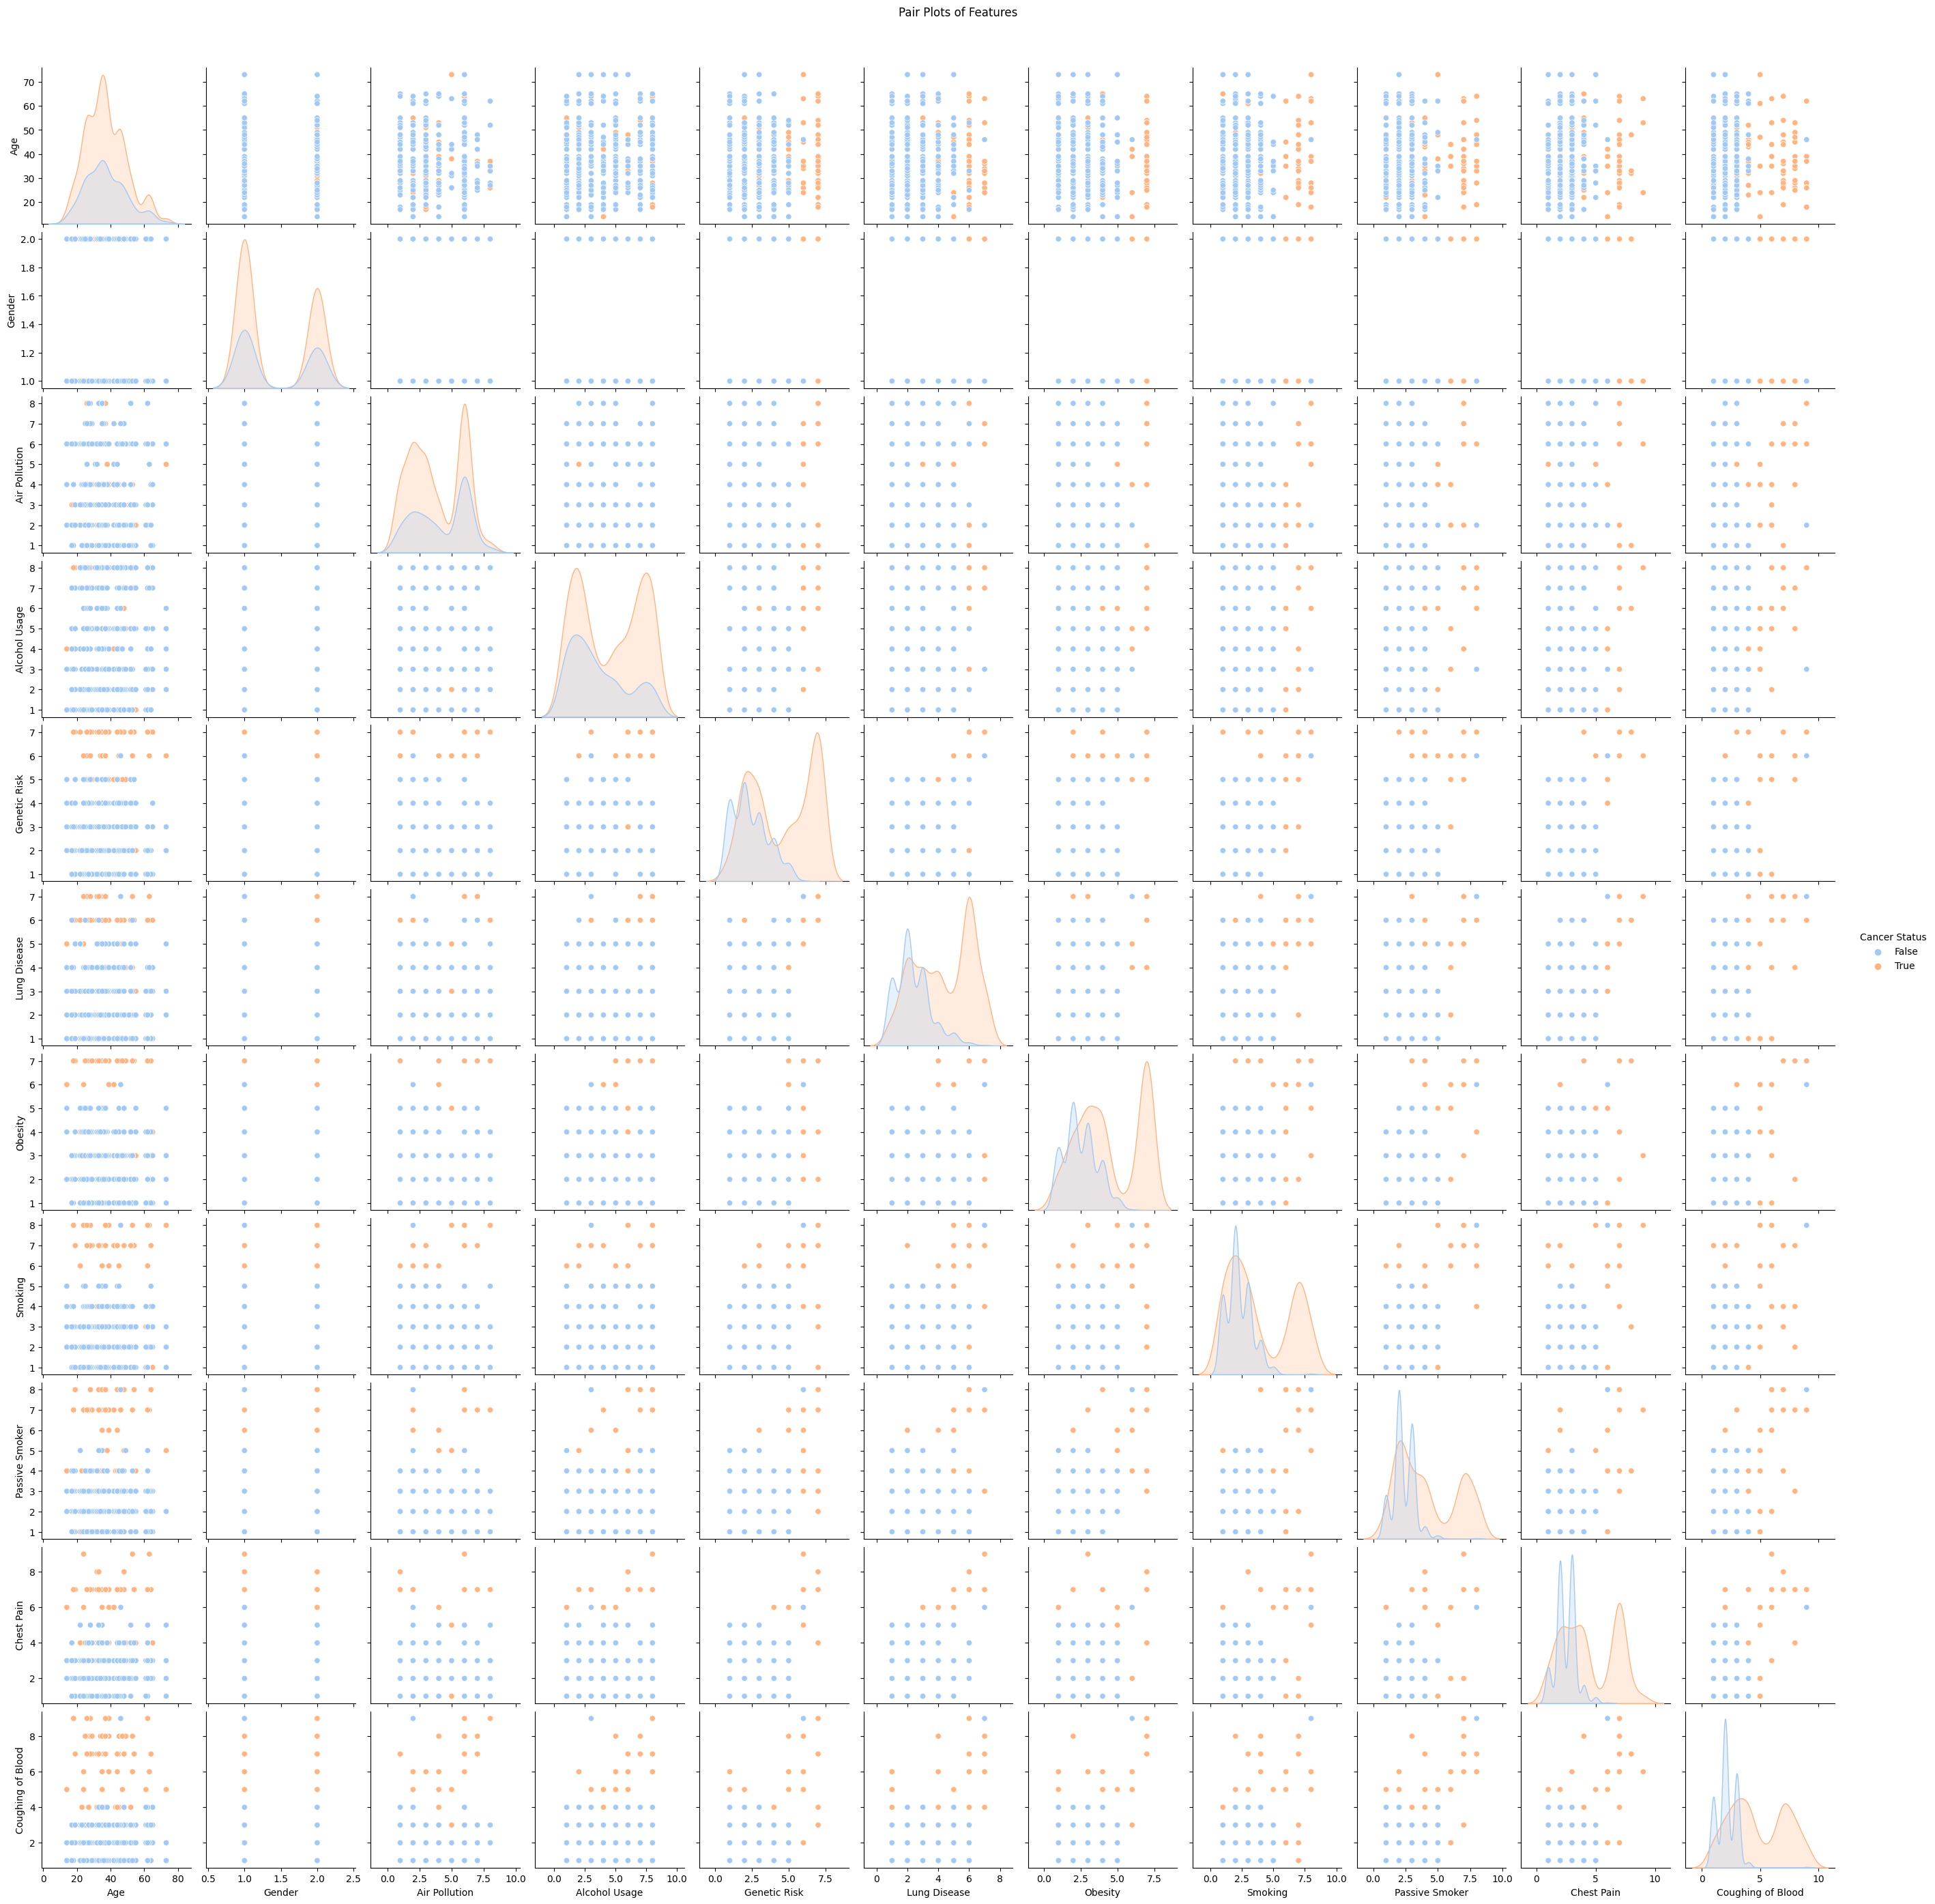

In [22]:
# Create pair plots for the features
sns.pairplot(df, hue='Cancer Status', vars=['Age','Gender','Air Pollution','Alcohol Usage','Genetic Risk',
        'Lung Disease','Obesity','Smoking',	'Passive Smoker', 'Chest Pain', 'Coughing of Blood'], palette="pastel")
plt.suptitle('Pair Plots of Features', y=1.02)
plt.show

In [25]:
# Required libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# k mode
!pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

features = ['Age', 'Alcohol Usage', 'Obesity', 'Smoking', 'Chest Pain', 'Coughing of Blood']
# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data =  df[features].to_numpy()

# k-mode
# kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
kmode = KModes(n_clusters = 2, init = "random", verbose=1)
clusters = kmode.fit_predict(data)
# clusters
# plot_clusters(data, clusters, 3)

# proportion of cancer patient that got clustered in cluster 1
p1 = sum(df['Cancer Status'][clusters[:]==0] == True)/sum(df['Cancer Status'] == True)

# proportion of healthy patient that got clustered in cluster 1
p2 = sum(df['Cancer Status'][clusters[:]==0] == False)/sum(df['Cancer Status'] == False)


# proportion of cancer patient that got clustered in cluster 2
p3 = sum(df['Cancer Status'][clusters[:]==1] == True)/sum(df['Cancer Status'] == True)

# proportion of healthy patient that got clustered in cluster 2
p4 = sum(df['Cancer Status'][clusters[:]==1] == False)/sum(df['Cancer Status'] == False)

print(f"{p1*100}% cancer patients and {p2*100}% healthy patients are in cluster 1. \
{p3*100}% cancer patients and {p4*100}% healthy patients are in cluster 2 .")


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 283, cost: 5984.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 285, cost: 6053.0
Run 2, iteration: 2/100, moves: 66, cost: 6053.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 362, cost: 5789.0
Run 3, iteration: 2/100, moves: 5, cost: 5789.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 235, cost: 6013.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 201, cost: 5941.0
Run 5, iteration: 2/100, moves: 27, cost: 5941.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 184, cost: 5850.0
Init: initializing centroids
Init: initializing clusters
Starting iteratio

In [45]:
### 4 Clusters

# df['Healthy'] = df['Severity'] == 3
# df['Low Severity'] = df['Severity'] == 0
# df['Medium Severity'] = df['Severity'] == 1
# df['High Severity'] = df['Severity'] == 2

# kmode = KModes(n_clusters = 4, init = "random", verbose=1)
# clusters = kmode.fit_predict(data)
# clusters
# # plot_clusters(data, clusters, 3)

# # proportion of Low Severity patient that got clustered in cluster 1
# p1 = sum(df['Medium Severity'][clusters[:]==0] == True)/sum(df['Medium Severity'] == True)

# # # proportion of healthy patient that got clustered in cluster 1
# # p2 = sum(df['Cancer Status'][clusters[:]==0] == False)/sum(df['Cancer Status'] == False)


# # # proportion of cancer patient that got clustered in cluster 2
# # p3 = sum(df['Cancer Status'][clusters[:]==1] == True)/sum(df['Cancer Status'] == True)

# # # proportion of healthy patient that got clustered in cluster 2
# # p4 = sum(df['Cancer Status'][clusters[:]==1] == False)/sum(df['Cancer Status'] == False)

# # print(p1, p2, p3, p4)

# p1

In [44]:
# Creating a proportional healthy and cancer patient dataset
df_cancer = df.loc[df['Cancer Status'] == True]
df_cancer = df_cancer.sample(frac = 0.465, random_state=42)
df_healthy = df.loc[df['Cancer Status'] == False]
balanced_df = pd.concat([df_cancer, df_healthy])

In [28]:
features = ['Alcohol Usage', 'Obesity', 'Smoking', 'Chest Pain', 'Coughing of Blood']

balanced_data =  balanced_df[features].to_numpy()

kmode = KModes(n_clusters = 2, init = "random", verbose=1)
cluster = kmode.fit_predict(balanced_data)
cluster
# balanced_df['Cancer Status'][cluster[:]==0] == True
cluster_1 = balanced_df[cluster[:]==0]
cluster_2 = balanced_df[cluster[:]==1]
p1 = sum(cluster_1['Cancer Status']== True)/sum(balanced_df['Cancer Status'] == True)
p2 = sum(cluster_1['Cancer Status']== False)/sum(balanced_df['Cancer Status'] == False)
p3 = sum(cluster_2['Cancer Status']== True)/sum(balanced_df['Cancer Status'] == True)
p4 = sum(cluster_2['Cancer Status']== False)/sum(balanced_df['Cancer Status'] == False)

print(f"{p1*100}% cancer patients and {p2*100}% healthy patients are in cluster 1. \
{p3*100}% cancer patients and {p4*100}% healthy patients are in cluster 2 .")

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 61, cost: 3026.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 111, cost: 3038.0
Run 2, iteration: 2/100, moves: 53, cost: 3038.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 150, cost: 2971.0
Run 3, iteration: 2/100, moves: 33, cost: 2971.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 163, cost: 2967.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 66, cost: 2867.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 212, cost: 2941.0
Run 6, iteration: 2/100, moves: 11, cost: 2941.0
Init: initializing centroids
Init: initializing clusters
Starting iteration

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# clf = LinearDiscriminantAnalysis()
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[54  0  0  3]
 [ 0 56  0  2]
 [ 0  0 80  0]
 [ 7  1  0 90]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        57
           1       0.98      0.97      0.97        58
           2       1.00      1.00      1.00        80
           3       0.95      0.92      0.93        98

    accuracy                           0.96       293
   macro avg       0.95      0.96      0.96       293
weighted avg       0.96      0.96      0.96       293



In [43]:
# # Elbow curve to find optimal K
# cost = []
# K = range(1,5)
# for k in list(K):
#     kmode = KModes(n_clusters=k, init = "random", n_init = 5, verbose=1)
#     kmode.fit_predict(balanced_data)
#     cost.append(kmode.cost_)

# plt.plot(K, cost, 'x-')
# plt.xlabel('No. of clusters')
# plt.ylabel('Cost')
# plt.title('Elbow Curve')
# plt.show()